# Data exploration and Cleaning

In [14]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import os, re, random

In [2]:
# Edit show function to store plots as PDFs

# Global counter for plot numbering
plot_counter = 0

# Create img directory if it doesn't exist
if not os.path.exists('img'):
    os.makedirs('img')

# Original show function
original_show = plt.show

def save_and_show():
    def custom_show(*args, **kwargs):
        global plot_counter
        plot_counter += 1
        
        # Get current figure and its title
        current_fig = plt.gcf()
        title = current_fig._suptitle
        if title:
            # Clean title for filename
            title_text = re.sub(r'[^\w\s-]', '', title.get_text()).strip()
            title_text = re.sub(r'[-\s]+', '_', title_text)
            filename = f'img/{plot_counter:03d}_{title_text}.pdf'
        else:
            filename = f'img/{plot_counter:03d}.pdf'
            
        # Save figure
        current_fig.savefig(filename, format='pdf', bbox_inches='tight')
        print(f"Saved plot to {filename}")
        
        # Call original show function
        return original_show(*args, **kwargs)
    
    # Replace plt.show with custom function
    plt.show = custom_show

# Initialize the callback
save_and_show()

## Load data


In [3]:
# Load the .npz File
data = np.load('training_set.npz')

In [4]:
# Extract Images and Labels
images = data['images']
labels = data['labels']

# Verify the shape of the images and labels
print(f'Images shape: {images.shape}')
print(f'Labels shape: {labels.shape}')

Images shape: (13759, 96, 96, 3)
Labels shape: (13759, 1)


In [5]:
label_dict = {
  0: "Basophil",
  1: "Eosinophil",
  2: "Erythroblast",
  3: "Immature granulocytes",
  4: "Lymphocyte",
  5: "Monocyte",
  6: "Neutrophil",
  7: "Platelet"
}

## Data exploration


Saved plot to img/014.pdf


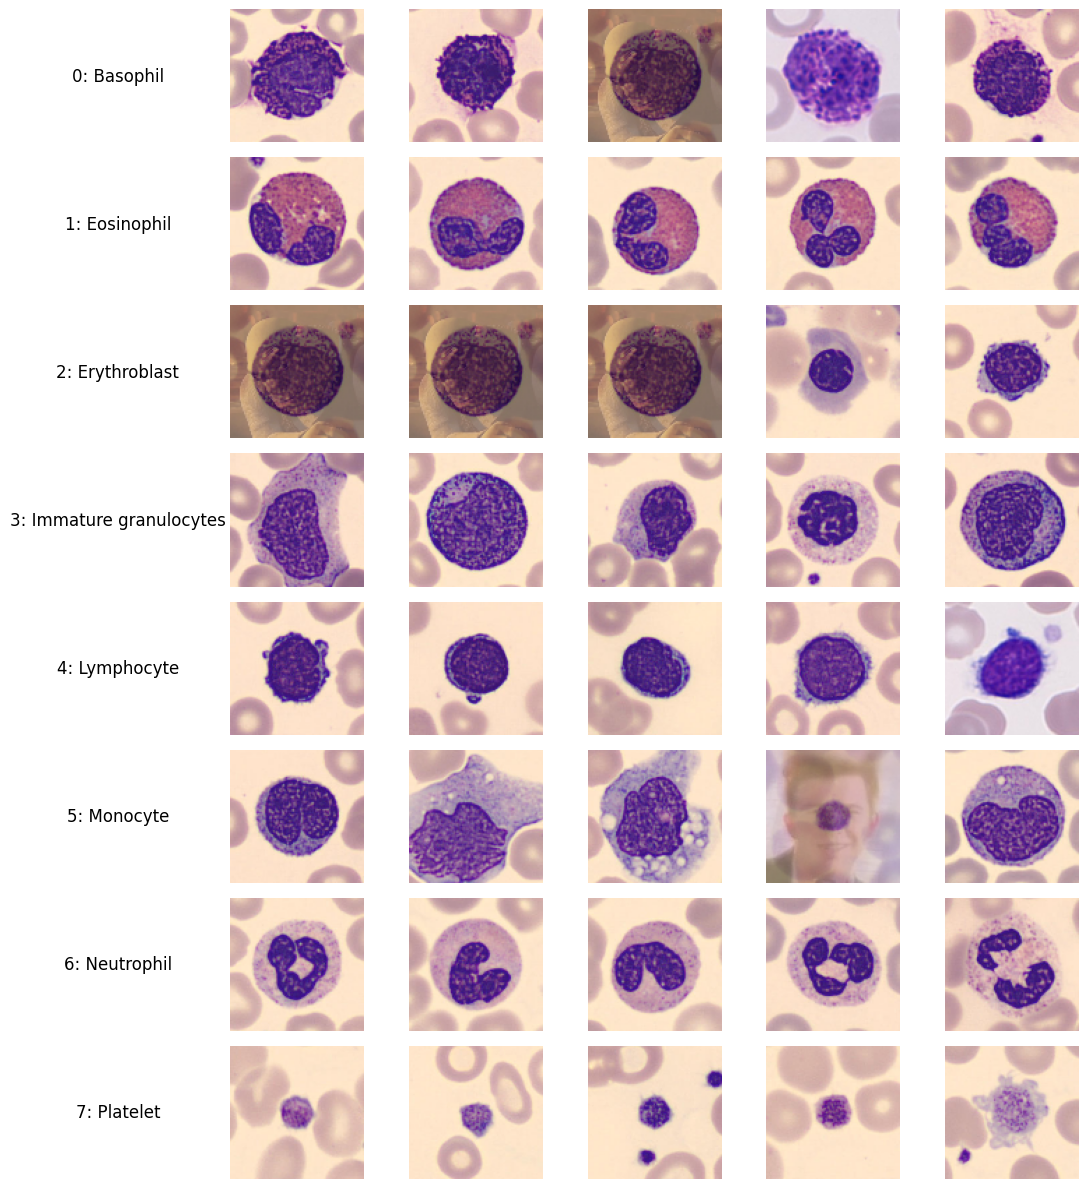

In [22]:
unique_labels = np.unique(labels)  # Get unique labels

# Number of images per class
images_per_class = 5

# Calculate total number of subplots
num_subplots = len(unique_labels) * images_per_class

# Calculate number of rows and columns for the grid
num_cols = images_per_class + 1  # +1 for the label column
num_rows = len(unique_labels)

# Create a single figure and axes with gridspec
fig, axes = plt.subplots(num_rows, num_cols, figsize=(11, num_rows * 1.5))

# Counter for current subplot
subplot_idx = 0

for row, label in enumerate(unique_labels):
    # Find indices of images with the current label
    indices = np.where(labels == label)[0]

    # Randomly select 5 indices
    selected_indices = random.sample(list(indices), images_per_class)

    # Print the label index and label name at the left of the row
    axes[row, 0].text(0.5, 0.5, f'{label}: {label_dict[label]}', ha='center', va='center', fontsize=12)
    axes[row, 0].axis('off')

    # Plot the selected images in the corresponding subplots
    for col, idx in enumerate(selected_indices, start=1):
        axes[row, col].imshow(images[idx], cmap='gray')
        axes[row, col].axis('off')

# Hide any unused subplots
for i in range(num_rows):
    for j in range(images_per_class + 1, num_cols):
        axes[i, j].axis('off')

plt.subplots_adjust(wspace=0.1, hspace=0.1)  # Adjust spacing between subplots
plt.tight_layout()
plt.show()

Label Distribution:
Label Basophil: 1052 occurrences
Label Eosinophil: 2381 occurrences
Label Erythroblast: 1285 occurrences
Label Immature granulocytes: 2226 occurrences
Label Lymphocyte: 1049 occurrences
Label Monocyte: 1393 occurrences
Label Neutrophil: 2530 occurrences
Label Platelet: 1843 occurrences
Saved plot to img/004.pdf


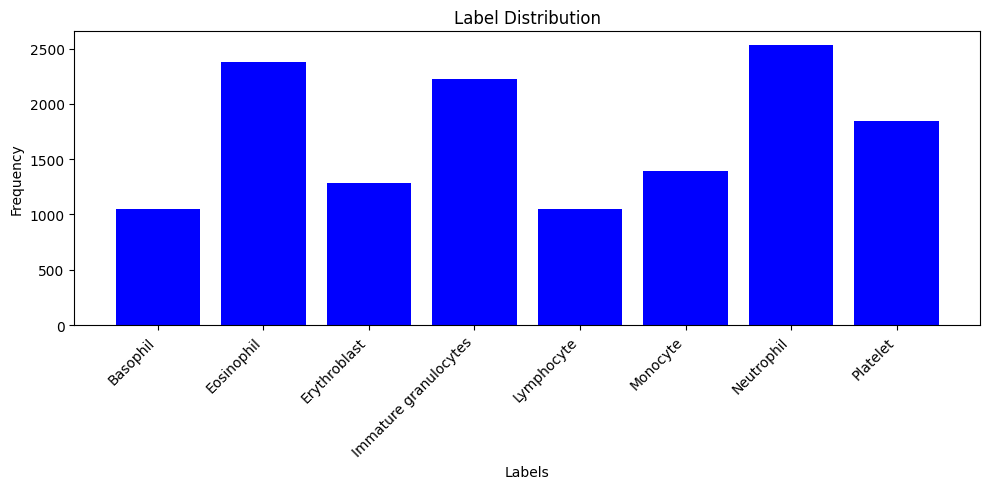

In [7]:
unique, counts = np.unique(labels, return_counts=True)
label_distribution = dict(zip(unique, counts))

print("Label Distribution:")
for label, count in label_distribution.items():
    print(f"Label {label_dict[label]}: {count} occurrences")

# Plot the histogram of label distribution
plt.figure(figsize=(10, 5))
plt.bar([label_dict[label] for label in label_distribution.keys()], label_distribution.values(), color='blue')
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.title('Label Distribution')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

## Data cleaning


Saved plot to img/005_Polluted_images.pdf


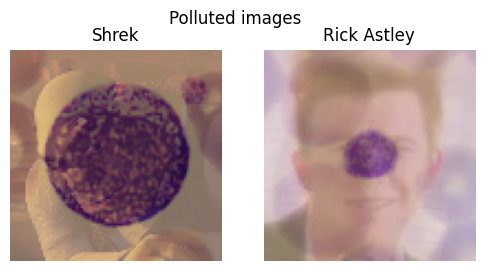

In [8]:
# IDs of the images to be plotted
image_id_shrek = 12080
image_id_rick = 13628

im_shrek = images[image_id_shrek]
im_rick = images[image_id_rick]

# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(6, 3))

# Plot the first image (Shrek)
axes[0].imshow(images[image_id_shrek])
axes[0].set_title('Shrek')
axes[0].axis('off')

# Plot the second image (Rick)
axes[1].imshow(images[image_id_rick])
axes[1].set_title('Rick Astley')
axes[1].axis('off')

# Set the main title for the plot
plt.suptitle('Polluted images')
plt.show()

Saved plot to img/018.pdf


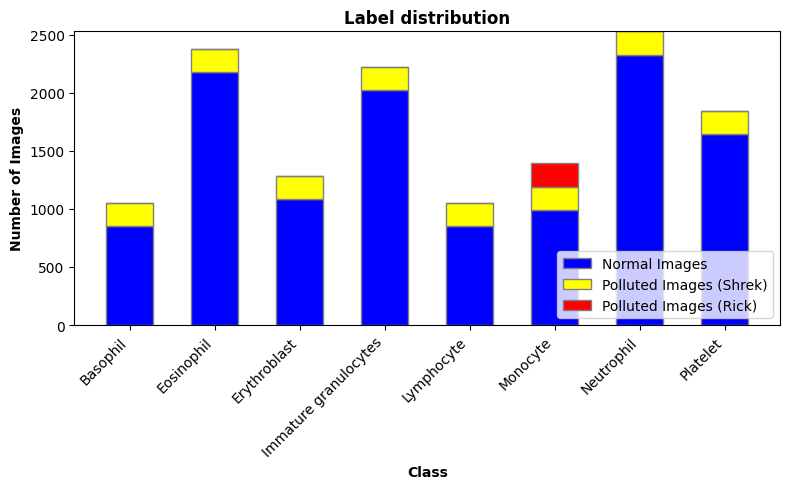

In [26]:
# Plot the histogram of label distribution

# Count the number of images that are identical to the Shrek and Rick images
identical_counts_shrek = {label: 0 for label in label_dict.keys()}
identical_counts_rick = {label: 0 for label in label_dict.keys()}

# Iterate over the images and count the number of identical images
for i, image in enumerate(images):
    if np.array_equal(image, im_shrek):
        identical_counts_shrek[labels[i][0]] += 1
    elif np.array_equal(image, im_rick):
        identical_counts_rick[labels[i][0]] += 1

# Calculate the number of normal images per class
normal_counts = {label: label_distribution[label] - identical_counts_shrek[label] - identical_counts_rick[label] for label in label_dict.keys()}

# Plot the bar plot
fig, ax = plt.subplots(figsize=(8, 5))

# Bar width
bar_width = 0.55

# Positions of the bars on the x-axis
r1 = np.arange(len(label_dict))

# Create bars
ax.bar(r1, [normal_counts[label] for label in label_dict.keys()], color='blue', width=bar_width, edgecolor='grey', label='Normal Images')
ax.bar(r1, [identical_counts_shrek[label] for label in label_dict.keys()], bottom=[normal_counts[label] for label in label_dict.keys()], color='yellow', width=bar_width, edgecolor='grey', label='Polluted Images (Shrek)')
ax.bar(r1, [identical_counts_rick[label] for label in label_dict.keys()], bottom=[normal_counts[label] + identical_counts_shrek[label] for label in label_dict.keys()], color='red', width=bar_width, edgecolor='grey', label='Polluted Images (Rick)')

# Add labels
ax.set_xlabel('Class', fontweight='bold')
ax.set_ylabel('Number of Images', fontweight='bold')
ax.set_title('Label distribution', fontweight='bold')
ax.set_xticks(r1)
ax.set_xticklabels([label_dict[label] for label in label_dict.keys()], rotation=45, ha='right')

# Add legend
ax.legend(loc='lower right')

# Show plot
plt.tight_layout()
plt.show()

In [ ]:
def clean_images(image_to_compare, dataset):

    # Find all images identical to the image with the given ID
    similar_images = []
    for i, image in enumerate(dataset['images']):
        if np.array_equal(image, image_to_compare):
            similar_images.append(i)

    # Create a mask to filter out the similar images
    mask = np.array([i not in similar_images for i in range(len(dataset['images']))])

    # Filter the images and labels
    clean_images = dataset['images'][mask]
    clean_labels = dataset['labels'][mask]

    # print the number of images removed
    print(f"Removed {len(similar_images)} images identical to image")

    return {'images': clean_images, 'labels': clean_labels}

In [ ]:
# Remove the polluted images from the dataset
data = clean_images(im_shrek, data)
data = clean_images(im_rick, data)

Removed 1600 images identical to image
Removed 200 images identical to image


In [ ]:
# Save the cleaned dataset
np.savez('clean_training_set.npz', images=data['images'], labels=data['labels'])